# Support Vector Regression

## importing the libraries

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## importing dataset

initializing `X` as independent variable and `y` as the variable we want to predict

In [7]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/05. Support Vector Regression/Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values


### checking independent variable and dependent varible data in lists

In [8]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [10]:
y_2d = y.reshape(-1, 1)
print(y_2d)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_features_X = sc_X.fit_transform(X)
scaled_features_y = sc_y.fit_transform(y_2d)

print(scaled_features_X)
print("\n")
print(scaled_features_y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## training the SVR model on the whole dataset

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(scaled_features_X, scaled_features_y.reshape(1, -1).ravel())
# print(scaled_features_y.reshape(1, -1).ravel())

SVR()

## predicting result

In [26]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## visualizing the result

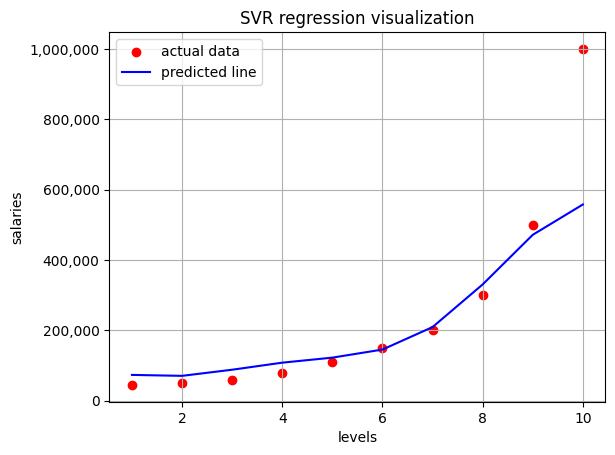

In [28]:
import matplotlib.ticker as mticker
plt.scatter(X, y, color = 'red', label = 'actual data')
plt.plot(X, sc_y.inverse_transform(regressor.predict(scaled_features_X).reshape(-1, 1)), color = 'blue', label = 'predicted line')
plt.legend()
plt.title('SVR regression visualization')
plt.xlabel('levels')
plt.ylabel('salaries')
plt.grid(True)
# Use plain number formatting for the y-axis (salary)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

## SVR better graph

/tmp/ipython-input-527530985.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


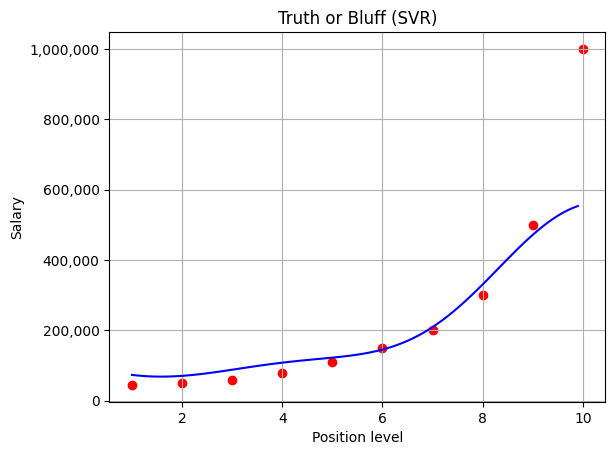

In [34]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()